## 题：构造50*20 用户—商家矩阵，利用SVD对矩阵进行分解，并解释获得的U、V矩阵的含义

在解答这题之前我想明确一点：为什么要用SVD对矩阵进行分解，结合上课内容和查阅资料，我得出以下结论。

SVD 全称：Singular Value Decomposition。SVD 是一种提取信息的强大工具，它提供了一种非常便捷的矩阵分解方式，能够发现数据中十分有意思的潜在模式。
主要应用领域包括：
隐性语义分析 (Latent Semantic Analysis, LSA) 或隐性语义索引 (Latent Semantic Indexing, LSI)；
推荐系统 (Recommender system)，可以说是最有价值的应用点；
矩阵形式数据（主要是图像数据）的压缩。


## SVD原理理解：
矩阵是线性空间里变换的描述。矩阵A与向量相乘，本质上对向量x进行一次线性变换（旋转或者拉伸变换），而该转换的效果等价于常数λ 乘以向量x （拉伸）的效果。所以，当求解矩阵的特征值与对应的特征向量时，就是为了求矩阵A能使得哪些向量只发生拉伸变换，而拉伸的程度用特征值λ 来度量。

     ### 数学证明SVD：https://blog.csdn.net/code__online/article/details/90705000
     ### 几何法证明SVD：https://zhuanlan.zhihu.com/p/36546367

In [31]:
#encoding: utf8
'''
'''

import numpy as np
import sys
import pdb

#from eig_by_qr import eig, cal_nullspace 

'''
                             +   +
SVD分解: A=USV', 或简化版 A=U S V' , U: m*r, S: r*r, V: n*r
 +   +   +-1    + 
A = Vnr Srr  U'rm, 伪逆
对A' * A而言，特征值恒>=0:
   ||Ax||**2 = x'A'Ax = x'*lambda * x = lambda * x' * x = lambda * ||x||**2 
   故而 lambda >= 0
'''

'''
retSimple: 是否返回简化svd分解
'''

def svd(A, retSimple=False):
    epsilon = 1e-4
    A_shape = A.shape
    ATA = np.dot(A.T, A)
    #pdb.set_trace()
    e,v = np.linalg.eig(ATA)
    e_sqrt = np.sqrt(np.take(e, np.where(e > epsilon)[0]))
    r = len(e_sqrt)

    U = np.zeros((A_shape[0], A_shape[0]))  #m*m
    S = np.zeros(A_shape)                   #m*n
    V = np.zeros((A_shape[1], A_shape[1]))  #n*n

    for i in range(r):
        ui = np.dot(A, v[:,i])
        ui = ui / np.sqrt(np.dot(ui, ui))
        U[:,i] = ui

        S[i,i] = e_sqrt[i]

    #pdb.set_trace()
    if retSimple:
        U = U[:, :r]
        S = S[:r,:r]
        V = v[:, :r].T
    else:
        if r < A_shape[0]:
            ns = cal_nullspace(U.T)  #求U.T的零空间, 即与U[0:r]正交的空间
            U[:,r:] = ns
        V = v.T

    return (U,S,V)

if __name__=='__main__':
    A=np.array([[4,11,14],[8,7,-2]])

    A=np.array([[1,-1], [-2,2], [2,-2]])
    #构建稀疏矩阵    
    A = np.zeros((50,20))
    for i in range(50):
        for j in range(20):
            if((i*j)%15==0):
                A[i,j] = random.randint(0,10)
    
    U,S,V = svd(A, retSimple = T)

    print  ("U:" )
    print(U)
    print  ("V:" )
    print(V)    
    print  ("S:" )
    print(S)
#     print  "S:" 
#     print S
#     print  "V:" 
#     print V

#     print "A:"
#     print A

#     print ("USV:")
#     print (np.dot(np.dot(U,S), V) )

    u,s,v = np.linalg.svd(A)
    print(u )
#     print(u)
#     print(s)
#     print(v)


U:
[[-4.16708012e-01 -3.71608807e-01 -6.36994067e-02  1.09807517e-01
  -1.68183198e-01 -4.83807013e-01 -3.14294500e-01  3.24601888e-01
  -9.59729971e-02  4.27368086e-01 -9.99186482e-02  4.45970463e-02
   4.26246408e-02]
 [-7.45908055e-02  1.19158286e-01 -4.31954336e-02 -9.47778267e-02
   6.14559570e-02 -1.29810379e-02 -6.53883881e-02  2.87209763e-02
  -1.11288294e-01 -3.09440615e-02  2.84500003e-02  1.33746745e-02
  -4.10624905e-03]
 [-8.59320481e-03  8.91564897e-03  1.22477957e-02  2.22482730e-02
   9.51779422e-03 -1.06621564e-02  7.18542579e-03 -1.31665177e-02
   1.32919372e-02  4.04032772e-03 -1.21127758e-03  3.98578554e-03
   6.90037189e-03]
 [-1.08916797e-01  1.15872051e-01  8.59639333e-02 -2.72169136e-01
  -2.23206959e-01  2.24274742e-01  1.89542497e-01  1.95016282e-01
  -1.54282154e-01  2.04225239e-01 -1.96581560e-02 -3.64548982e-02
  -5.05463671e-02]
 [-1.08571048e-01  1.60380517e-01 -1.61221931e-02 -4.79293466e-02
   9.60693923e-02 -4.37756107e-02 -5.52262878e-02 -2.91371811e-

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: ComplexWarning: Casting complex values to real discards the imaginary part


V表示了原始域的标准正交基；
U 表示经过 变换后的新标准正交基；
S表示了 V 中的向量与 U 中相对应向量之间的比例（伸缩）关系；
在用户——商家矩阵中，U表示用户对商家的喜爱程度，V的转置表示商家对用户的影响力大小

# 将用户-商家矩阵 用热力图绘制出来 便于直观的发现两个变量关系


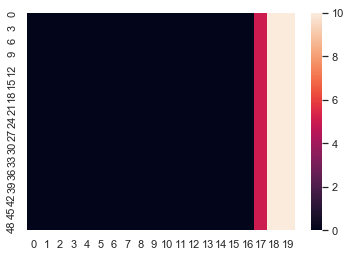

In [60]:
import seaborn as sns
#定义一个有规律的用户商家矩阵
A = np.zeros((50,20))
for i in range (50):
    A[i,19]  = 10
    A[i,18] = 10
    A[i,17] = 5
u,s,v = np.linalg.svd(A)
sns.set(color_codes = True)
sns.heatmap(A)


## 发现用户对第16个项目情有独钟 
那么。。。。。

看一看SVD分解后的矩阵U,V,S是否捕捉了这一特点

(50, 50)
[ 1.06066017e+002  5.67720272e-015  3.49285555e-015  2.65339934e-030
  3.12463384e-031  1.89685076e-031  1.56409520e-047  7.37097608e-048
  7.92028388e-049  8.25108615e-064  5.99695255e-065  2.40017273e-065
  2.04733321e-080  1.65429057e-081  6.19675591e-082  6.83208908e-097
  2.17996041e-098  5.45200304e-099  3.34679359e-113 -0.00000000e+000]


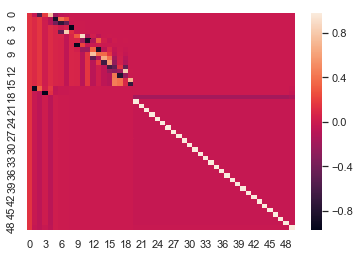

In [61]:
sns.heatmap(u )
print(u.shape)
print(s )


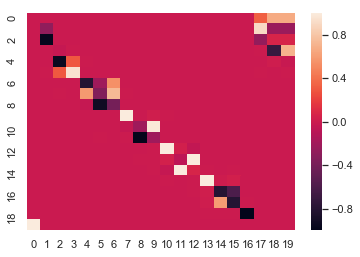

In [62]:
sns.heatmap(v )

### SVD 确实可以很好地捕捉原始数据的特征，但是解释性很差
